## Menentukan boundary dan skeletonize gambar circle

### Baca Gambar 

#### Import library terlebih dahulu

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert

#### Tampilkan gambar yang ingin diproses

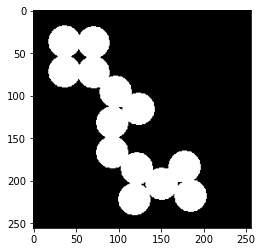

In [2]:
img = cv2.imread('circles.png')
plt.imshow(img)

### Boundary
#### Boundary disini adalah membuang isi dari objek gambar dan hanya menyisakan pinggir sisinya saja. Pertama buat array(structure element) nya dahulu (saya lihat di internet, tutorialnya memakai array 7x7)

In [3]:
k = 7
kernel = np.ones((k,k),np.uint8)
constant = (k-1)//2
kernel

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

#### Disini kernel berfungsi untuk menentukan jumlah pixel.  kali ini saya memakai metode erosion untuk pemrosesan gambar. erosion sesuai dengan namanya akan mengambil value yang paling kecil

In [4]:
img = cv2.imread('circles.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

#### Bisa dilihat terdapat perbedaan dengan gambar pertama yaitu di gambar hasil erosi ini, bulatan nya terlihat berbeda

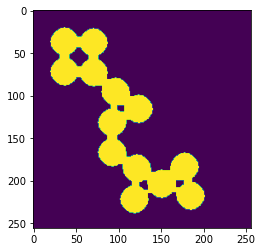

In [5]:
plt.imshow(erosion)

#### Untuk membuat boundary, tinggal kita kurangi hasil gambar pertama dengan gambar hasil erosi. berikut adalah hasil pengurangan dan hasilnya adalah boundary dari gambar itu sendiri

In [6]:
boun = img - erosion

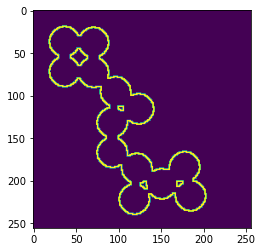

In [7]:
plt.imshow(boun)

### Skeletonize
#### seperti namanya, skeletonize adalah suatu metode pemrosesan gambar yang mana pixel yang berlebihan harus dibuang. hasil dari metode ini sama seperti namanya, objek gambar akan terlihat seperti garis-garis (skeleton)

#### baca dulu gambarnya

In [8]:
image = cv2.imread('circles.png')

skeleton = skeletonize(image)


#### setelah itu tentukan plot dan bandingkan hasil gambar normal dan hasil gambar skeletonize

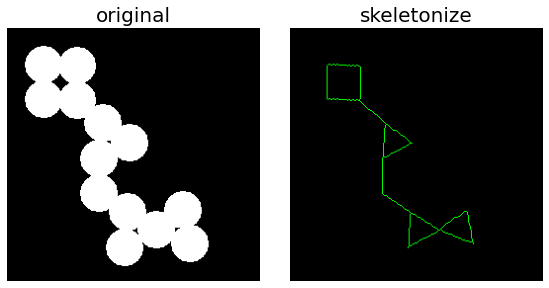

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeletonize', fontsize=20)

fig.tight_layout()
plt.show()

## Menghitung jumlah circle dalam gambar PCB

#### Tampilkan Gambar

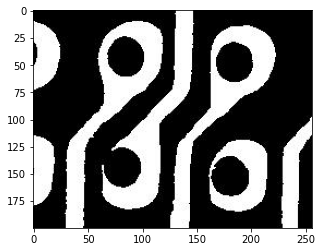

In [10]:
img = cv2.imread('pcb.jpg')
plt.imshow(img)

#### Disini kernel berfungsi untuk menentukan jumlah pixel.  kali ini saya memakai metode dilation untuk pemrosesan gambar. 

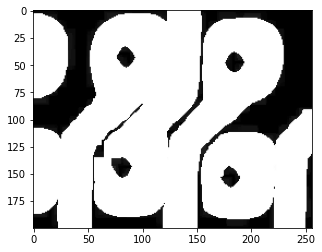

In [11]:
img = cv2.imread('pcb.jpg')
kernel = np.ones((3,3),np.uint8)
dilasi = cv2.dilate(img, kernel, iterations = 7)
plt.imshow(dilasi)

#### ukuran kernel harus (3,3) karena jika kurang/lebih lingkarang tidak akan terdeteksi

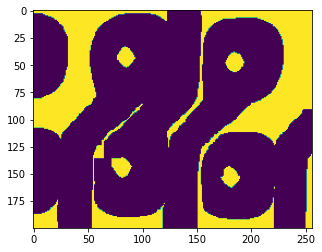

In [12]:
gambarungu = cv2.cvtColor(dilasi, cv2.COLOR_BGR2GRAY)
_, gambarungu = cv2.threshold(gambarungu, 240 , 255, cv2.CHAIN_APPROX_NONE)

plt.imshow(gambarungu)

#### Setelah itu dengan menggunakan metode connected component, ditentukan jumlah lingkaran yang ada dalam gambar

In [13]:
nb_components, output, stats, centroids  = cv2.connectedComponentsWithStats( gambarungu, connectivity = 8)

#### setelah itu kita menentukan ukuran lingkaran dengan for loops

In [14]:
circlecenter = []

sizes = stats[:, -1]
for i in range(2, nb_components):
        if sizes[i] < 250 and sizes[i] > 200:
            print(stats[i])
            circlecenter.append(centroids[i])

[ 77  33  17  20 212]
[176  38  18  19 225]
[ 72 135  19  19 244]
[172 143  18  20 217]


In [15]:
outimg = img.copy()
for x in circlecenter:
    tup = (
        int(x[0]),
        int(x[1])
    )
    cv2.circle(outimg, tup , 10, (0,0,255), -1)

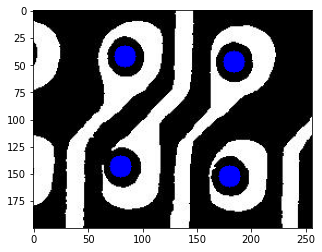

In [16]:
plt.imshow(outimg)